In [1]:
%matplotlib inline


# Model eigenvalues  

Eigenvalues are a fundamental concept in dynamic models. In simple terms, they summarize the adjustment process within a model. In the context of dynamic models, the eigenvalues of the model describe the behavior of the system over time. The sign and magnitude of the eigenvalues determine whether a system of equations will converge to a stable equilibrium, oscillate, or diverge. For macro models they determine whether the model is stable, marginally stable, or unstable.

In the case of a macromodel, which is effectively a system of differential equations, the eigenvalues of the coefficient matrix determine whether the system is stable or unstable. If all the eigenvalues have negative real parts, then the system is stable and will converge to a steady state over time. If at least one eigenvalue has a positive real part, then the system is unstable, and the solutions will diverge over time.




This Notebook uses a  model for Pakistan described here: {cite:author}`Burns2021`

## Imports

Modelflow's modelclass includes most of the methods needed to manage a model in Modelflow.

In [2]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')
  incolab = True  
else:
  incolab = False 

In [3]:
from modelclass import model 
from modelnewton import newton_diff
import modelmf
model.widescreen()
model.scroll_off()

In [4]:
%load_ext autoreload
%autoreload 2

## Load a pre-existing model, data and descriptions 
The file `pak.pcim` contains a dump of model equations, dataframe, simulation options and variable descriptions. The file has been created when onboarding the model. 
Examples can be found [here](../../onboard/eviews/onboard%20one%20model%20from%20%20wf1.html#onboard-a-model-defined-in-a-wf1-file)

In [5]:
mpak,baseline = model.modelload('../../models/pak.pcim',alfa=0.7,run=1)

Open file from URL:  https://raw.githubusercontent.com/IbHansen/modelflow-manual/main/model_repo/pak.pcim


In [43]:
mpak_newton = newton_diff(mpak,forcenum=0,ljit=False)      # create a newton_diff instance which contains derivatives 

C:\Users\wb268970\.conda\envs\modelflow\lib\site-packages\IPython\core\events.py:89: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  func(*args, **kwargs)


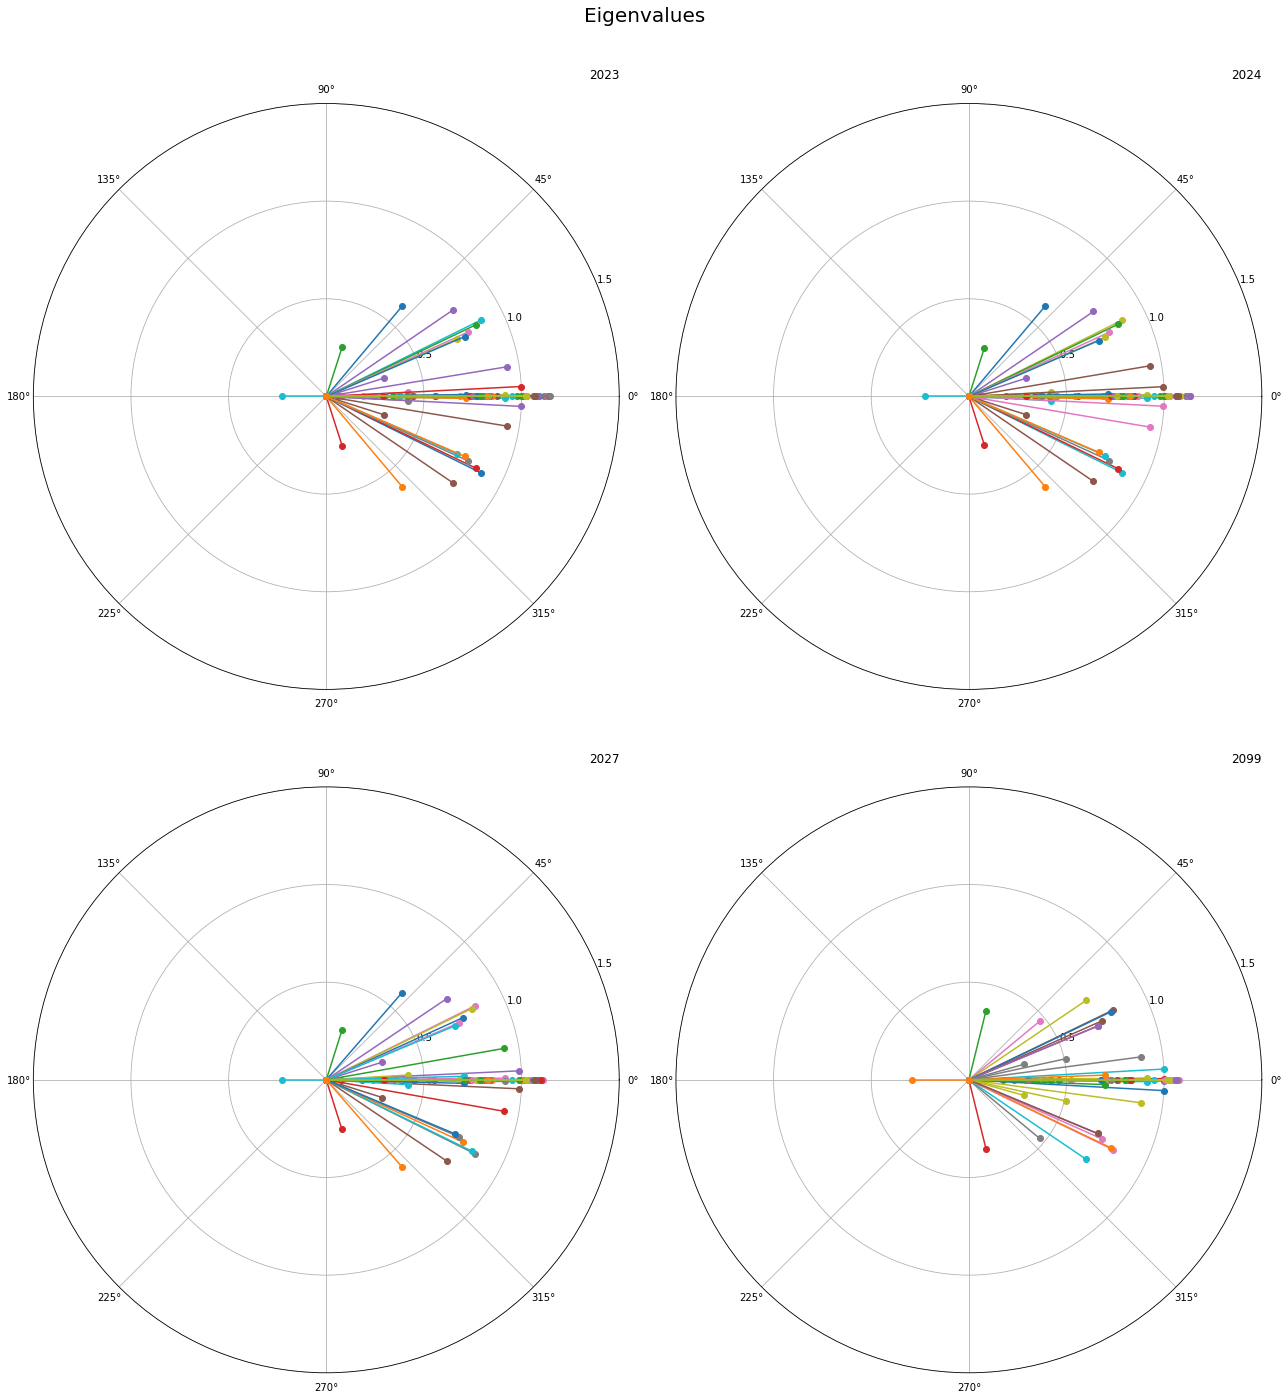

In [46]:
eig_dic = mpak_newton.get_eigenvectors(filnan = True,periode= (2023,2024,2027,2099),silent=True) #  
mpak_newton.eigplot_all(eig_dic,size=(3,3));



In [8]:
help(mpak_newton)

Help on newton_diff in module modelnewton object:

class newton_diff(builtins.object)
 |  newton_diff(mmodel, df=None, endovar=None, onlyendocur=False, timeit=False, silent=True, forcenum=False, per='', ljit=0, nchunk=None, endoandexo=False)
 |  
 |  Class to handle newron solving 
 |  this is for un-nomalized or normalized models ie models of the forrm 
 |  
 |  0 = G(y,x)
 |  y = F(y,x)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, mmodel, df=None, endovar=None, onlyendocur=False, timeit=False, silent=True, forcenum=False, per='', ljit=0, nchunk=None, endoandexo=False)
 |      Args:
 |          mmodel (TYPE): Model to analyze.
 |          df (TYPE, optional): Dataframe. if None mmodel.lastdf will be used 
 |          endovar (TYPE, optional): if set defines which endogeneous to include . Defaults to None.
 |          onlyendocur (TYPE, optional): Only calculate for the curren endogeneous variables. Defaults to False.
 |          timeit (TYPE, optional): writeout time informa

In [50]:
mpak_newton.get_eigenvectors?



In [14]:
eig_dic


{2023: array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
 2024: array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
 2027: array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
 2099: array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}

In [40]:
#e2027=eig_dic[2023]
#e2027[5]
#
#import pandas as pd
#df=pd.DataFrame(e2027)
#
#df.tail(10)

,0
1502,0.791542+0.000000j
1503,0.000000+0.000000j
1504,0.000000+0.000000j
1505,0.000000+0.000000j
1506,0.000000+0.000000j
1507,0.000000+0.000000j
1508,1.024408+0.000000j
1509,0.000000+0.000000j
1510,0.000000+0.000000j
1511,0.000000+0.000000j
